# Данный notebook нацелен на тренировку навыков с библиотеками pandas и matplotlib.
  Будем анализировать файл с прокатом велосипедов.

In [26]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("day.csv")

df.head(10)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Каждая строка представляет собой данные о конкретном дне. Исходя из этого, можем придумать ряд задач, полезных для анализа.

## Узнаем среднее количество аренд по сезонам и месяцам. Выявим закономерности


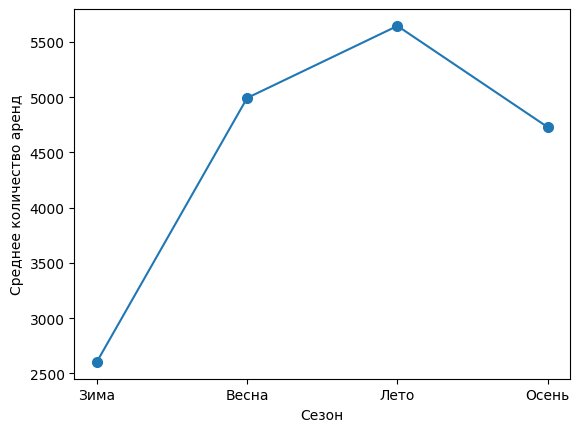

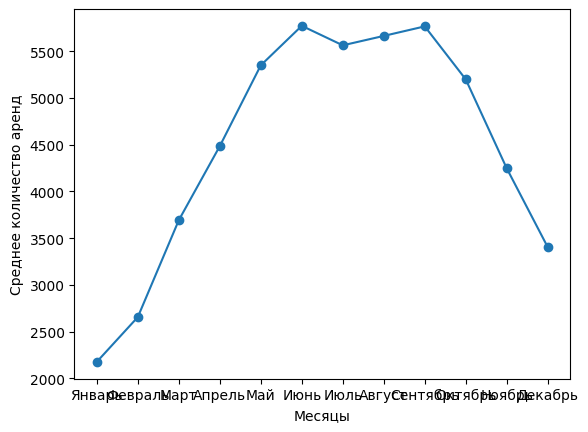

In [27]:
depend_on_season = df.groupby('season').cnt.mean()   # среднее количество аренд по сезонам
depend_on_season.index = ['Зима', 'Весна', 'Лето', 'Осень']   # замена индексов

plt.plot(depend_on_season, marker='o', markersize=7)
plt.xlabel('Сезон')
plt.ylabel('Среднее количество аренд')
plt.show()

depend_on_month = df.groupby('mnth').cnt.mean()
depend_on_month.index = ['Январь', 'Февраль', 'Март',
                          'Апрель', 'Май', 'Июнь',
                          'Июль', 'Август', 'Сентябрь',
                          'Октябрь', 'Ноябрь', 'Декабрь']

plt.plot(depend_on_month, marker='o')
plt.xlabel('Месяцы')
plt.ylabel('Среднее количество аренд')
plt.show()

Очевидно, что пик аренды приходится на летний сезон. Но если смотреть по месяцам, то чаще всего арендуют велосипеды в июне и в сентябре. Такая группировка позволяет узнать, что пик приходится все-таки на начала лета и осени.





## Теперь узнаем, в какие дни чаще арендуют велосипеды: будни или выходные
В группировке выделим зарегистрированных и незарегистрированных пользователей.

In [43]:
a = df.groupby('workingday')[['registered', 'casual']].mean()
a.index = ['Выходные', 'Будни']
a

# plt.plot(a.index, a['registered'], label='Зарегистрированные')
# plt.plot(a.index, a['casual'], label='Незарегистрированные')

# plt.legend()
# plt.show()


,registered,casual
Выходные,2959.034632,1371.134199
Будни,3978.250000,606.570000


Видим, что:
*   В будни в среднем арендуют чаще
*   Зарегистрированные пользователи всегда чаще пользуются арендой. Причем в будни разрыв между двумя группами увеличивается

Для наглядности добавим график для каждого отдельного дня:

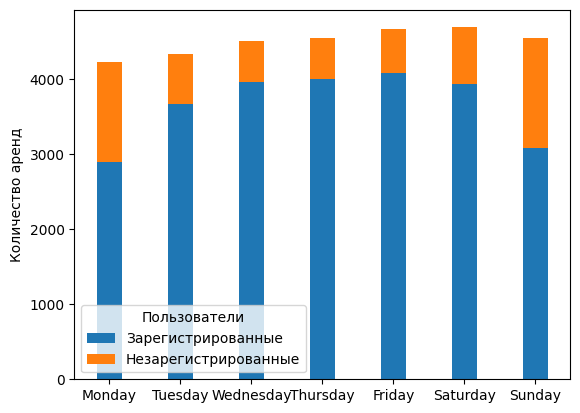

In [46]:
b = df.groupby('weekday')[['registered', 'casual']].mean()
indexes = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

reg = df.groupby('weekday').registered.mean()
cas = df.groupby('weekday').casual.mean()
fig, ax = plt.subplots()
ax.bar(indexes, reg, width=0.35, label='Зарегистрированные')
ax.bar(indexes, cas, width=0.35, bottom = reg, label='Незарегистрированные')

ax.set_ylabel('Количество аренд')
ax.legend(loc='lower left', title='Пользователи')
plt.show()
# plt.bar(b.index, b)
# plt.ylabel('Кол-во аренд')
# plt.xlabel('Дни недели')
# plt.show()

## Узнаем, при каких погодных условиях аренда почти прекращается.

4504